<a href="https://colab.research.google.com/github/Muhammad-Ahtasham/Learnings/blob/master/Nerf_Vid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
H = 400
W = 400
f = 1200

In [3]:
rays_origin = np.zeros((H * W, 3))
rays_direction = np.zeros((H * W, 3))

u = np.arange(W)
v = np.arange(H)
print(u.shape)
print(v.shape)

(400,)
(400,)


In [4]:
u,v = np.meshgrid(u,v)

In [5]:
print(u)

[[  0   1   2 ... 397 398 399]
 [  0   1   2 ... 397 398 399]
 [  0   1   2 ... 397 398 399]
 ...
 [  0   1   2 ... 397 398 399]
 [  0   1   2 ... 397 398 399]
 [  0   1   2 ... 397 398 399]]


In [15]:
dirs = np.stack((u-W/2,
                 -(v-H/2),
                 - np.ones_like(u) * f), axis = -1)

rays_direction = dirs / np.linalg.norm(dirs, axis = -1, keepdims = True)

In [16]:
rays_direction = rays_direction.reshape(-1,3)

rays_direction.shape

(160000, 3)

In [18]:
import matplotlib.pyplot as plt

def plot_rays(o, d, t):
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')


  pt1 = o
  pt2 = o + t*d

  for p1, p2 in zip(pt1[::2], pt2[::2]):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]])

  plt.show()

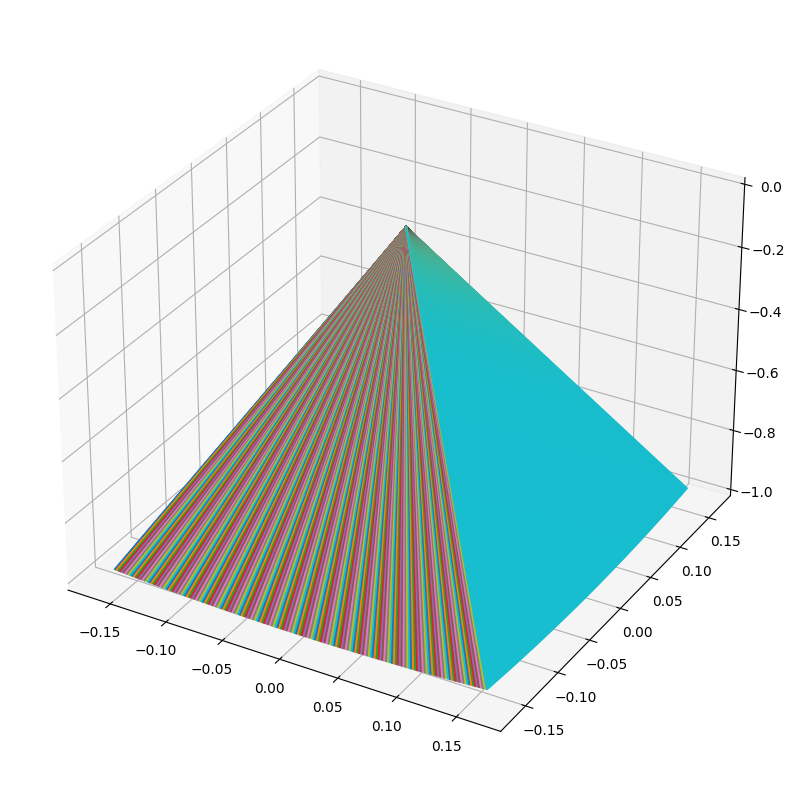

In [19]:
plot_rays(rays_origin, rays_direction, 1)